# Anomility Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def detect_anomility(data_array, k=2, threshold = 1):
    k = k
    threshold = threshold
    datapoint = []
    anomility = []
    for i in range(len(data_array)):
        mean = 0
        distances = []
        for j in range(len(data_array)):
            if i == j: continue
            dist = data_array[j] - data_array[i]
            print(data_array[i], data_array[j], dist)
            distances.append(abs(dist))
#             print(distances)
        
        distances.sort()
        kmin = distances[0: k]
#         print(kmin)
        for j in range(len(kmin)):
            mean += kmin[j]
        mean = mean / len(kmin)
        print(f'Mean of {data_array[i]}: {mean}')
        if mean > threshold: anomility.append(data_array[i])
        else: datapoint.append(data_array[i])

    return datapoint, anomility

## Example Dataset

In [9]:
# data = pd.DataFrame({
#     "name": ["Mohan", "Maria", "Sakib", "Tao", "Virat", "Khushbu", "Mitr", "Selena", "John", "Imran", "Josa", "Deepika", "Joseph", "Binod", "Gul", "Johnson", "Donald", "Aamir", "Ken", "Liu"],
#     "height": [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6.0, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]
# })

data = pd.DataFrame({
    "name": ["Mohan", "Maria", "Sakib", "Tao", "Virat", "Khushbu", "Liu"],
    "height": [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 40.2]
})

d = list(data["height"])
data

,name,height
0,Mohan,1.2
1,Maria,2.3
2,Sakib,4.9
3,Tao,5.1
4,Virat,5.2
5,Khushbu,5.4
6,Liu,40.2


In [10]:
datapoint, anomility = detect_anomility(d)

1.2 2.3 1.0999999999999999
1.2 4.9 3.7
1.2 5.1 3.8999999999999995
1.2 5.2 4.0
1.2 5.4 4.2
1.2 40.2 39.0
Mean of 1.2: 2.4
2.3 1.2 -1.0999999999999999
2.3 4.9 2.6000000000000005
2.3 5.1 2.8
2.3 5.2 2.9000000000000004
2.3 5.4 3.1000000000000005
2.3 40.2 37.900000000000006
Mean of 2.3: 1.85
4.9 1.2 -3.7
4.9 2.3 -2.6000000000000005
4.9 5.1 0.1999999999999993
4.9 5.2 0.2999999999999998
4.9 5.4 0.5
4.9 40.2 35.300000000000004
Mean of 4.9: 0.24999999999999956
5.1 1.2 -3.8999999999999995
5.1 2.3 -2.8
5.1 4.9 -0.1999999999999993
5.1 5.2 0.10000000000000053
5.1 5.4 0.3000000000000007
5.1 40.2 35.1
Mean of 5.1: 0.1499999999999999
5.2 1.2 -4.0
5.2 2.3 -2.9000000000000004
5.2 4.9 -0.2999999999999998
5.2 5.1 -0.10000000000000053
5.2 5.4 0.20000000000000018
5.2 40.2 35.0
Mean of 5.2: 0.15000000000000036
5.4 1.2 -4.2
5.4 2.3 -3.1000000000000005
5.4 4.9 -0.5
5.4 5.1 -0.3000000000000007
5.4 5.2 -0.20000000000000018
5.4 40.2 34.800000000000004
Mean of 5.4: 0.25000000000000044
40.2 1.2 -39.0
40.2 2.3 -37.9

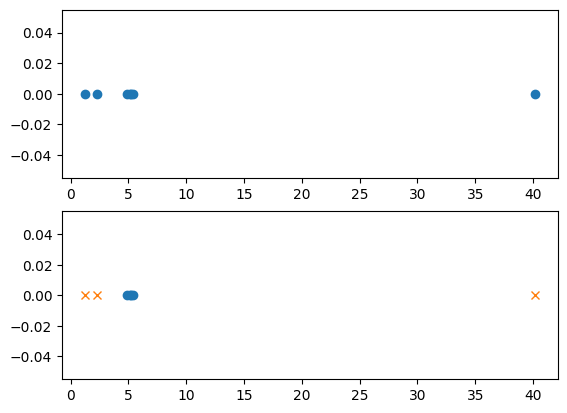

In [11]:
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(d, np.zeros_like(d) + val, 'o')  # ploting the original data
plt.subplot(212)
plt.plot(datapoint, np.zeros_like(datapoint) + val, 'o') # ploting the original data
plt.plot(anomility, np.zeros_like(anomility) + val, 'x') # plotting anomilities

## Selected Dataset

In [9]:
df = pd.read_csv('../Country Quater Wise Visitors Imputed.csv')

In [10]:
d2 = list(df.T[0])
name, d2 = d2[0], d2[1: ]

In [11]:
datapoint2, anomility2 = detect_anomility(d2, k=4)

18.6
17.400000000000002
3.6000000000000014
1.1000000000000014
18.6
17.200000000000003
2.299999999999997
1.3999999999999986
19.0
16.6
1.7999999999999972
0.7999999999999972
19.200000000000003
16.200000000000003
2.1999999999999957
3.6199999999999974
18.96
16.91
0.1600000000000037
3.299999999999997
18.8
18.3
1.3999999999999986
55.800000000000004
32.800000000000004
31.1
24.3
18.6
1.1999999999999993
22.200000000000003
19.700000000000003
0.0
1.4000000000000004
20.9
20.0
0.40000000000000036
2.0
20.4
19.4
0.5999999999999996
2.3999999999999986
20.799999999999997
22.22
0.35999999999999943
1.6900000000000013
18.439999999999998
21.9
0.1999999999999993
0.3000000000000007
20.0
74.4
14.2
12.5
5.699999999999999
17.400000000000002
1.1999999999999993
21.000000000000004
18.500000000000004
1.1999999999999993
0.20000000000000107
19.7
18.8
1.5999999999999996
0.8000000000000007
19.2
18.2
1.799999999999999
1.1999999999999993
19.599999999999998
21.02
1.5599999999999987
0.490000000000002
17.24
20.7
1.39999999999

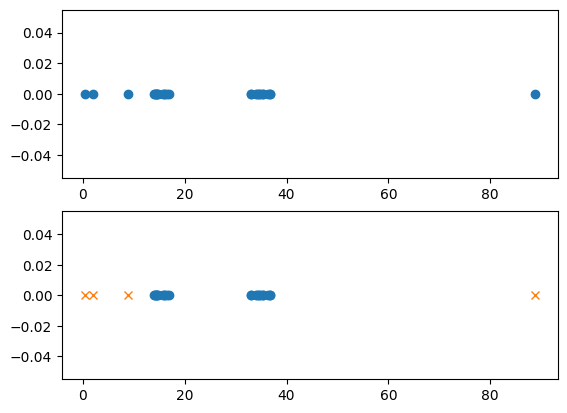

In [12]:
val = 0

plt.figure(1)
plt.subplot(211)
plt.plot(d2, np.zeros_like(d2) + val, 'o')  # ploting the original data
plt.subplot(212)
plt.plot(datapoint2, np.zeros_like(datapoint2) + val, 'o')  # ploting the original data
plt.plot(anomility2, np.zeros_like(anomility2) + val, 'x')  # plotting anomilities